In [24]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import plotly.express as px

In [ ]:
os.chdir('../..')

In [2]:
df = pd.read_parquet('data\\s2orc\\meme_score\\reduced_300_big_cleaned_mini_all-MiniLM-L6-v2_eps_0.0.parquet')

In [3]:
df.head()

,meme_id,meme_score_vanilla,sticking_factor_vanilla,sparking_factor_vanilla,meme_score_BT,sticking_factor_BT,sparking_factor_BT,meme_score_A,sticking_factor_A,sparking_factor_A
0,0,0.000000,0.000000,0.000075,0.000000,0.000000,0.000075,0.000000,0.000000,0.000075
1,1,0.000000,0.000000,0.000039,0.000000,0.000000,0.000039,0.000000,0.000000,0.000039
2,2,0.000000,0.000000,0.000012,0.000000,0.000000,0.000012,0.000000,0.000000,0.000012
3,3,287143.872124,0.237580,0.002721,784105.513713,0.648760,0.002721,291491.105785,0.241176,0.002721
4,4,83708.871995,0.076922,0.000066,544084.649182,0.499975,0.000066,83708.871995,0.076922,0.000066


In [4]:
df = df[df['meme_score_A'] > 0]
df = df[df['meme_score_BT'] > 0]
df = df[df['meme_score_vanilla'] > 0]

In [5]:
names = pd.read_parquet('data\\s2orc\\clusterings\\clusters_names\\reduced_300_big_cleaned_mini_all-MiniLM-L6-v2_eps_0.0.parquet')

In [6]:
names.head()

,meme_id,most_common,best_tfidf
0,0,mercer kernel,mercer_ljupˇco
1,1,hedging,hedging_aﬀect
2,2,nas parallel benchmarks,benchmarks_openmpbase
3,3,saliency map,saliency_salient
4,4,remediation,remediation_remedia


In [7]:
df = df.merge(names, on='meme_id', how='left')

In [8]:
df.head()

,meme_id,meme_score_vanilla,sticking_factor_vanilla,sparking_factor_vanilla,meme_score_BT,sticking_factor_BT,sparking_factor_BT,meme_score_A,sticking_factor_A,sparking_factor_A,most_common,best_tfidf
0,3,287143.872124,0.237580,0.002721,784105.513713,0.648760,0.002721,291491.105785,0.241176,0.002721,saliency map,saliency_salient
1,4,83708.871995,0.076922,0.000066,544084.649182,0.499975,0.000066,83708.871995,0.076922,0.000066,remediation,remediation_remedia
2,6,612253.114963,0.427135,0.000236,686833.577530,0.479166,0.000236,607530.535767,0.423841,0.000236,bert,bert_bertoni
3,7,64696.263292,0.057927,0.000856,52149.177156,0.046693,0.000856,64267.320037,0.057543,0.000856,receptive field,receptive_nonclassical
4,9,96659.093067,0.087480,0.003298,52338.705271,0.047368,0.003298,93347.425388,0.084483,0.003298,frame,grabber_frame


<AxesSubplot:xlabel='meme_score_BT', ylabel='Count'>

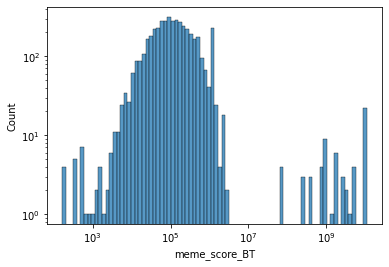

In [9]:
sns.histplot(
    df['meme_score_BT'], log_scale=(True, True),
)

<AxesSubplot:xlabel='meme_score_A', ylabel='Count'>

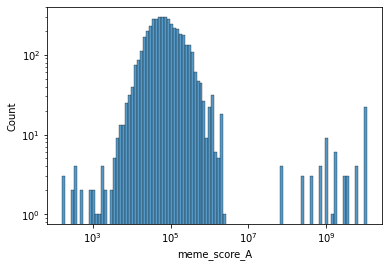

In [10]:
sns.histplot(
    df['meme_score_A'], log_scale=(True, True),
)

In [11]:
df.sort_values(by='meme_score_BT', ascending=False)[['meme_score_BT', 'most_common']]

,meme_score_BT,most_common
3956,1.073016e+10,commercial and industrial environment
2543,1.073016e+10,trusted hardware primitive
4099,1.073016e+10,hardware relate variable
4340,1.073016e+10,domain relevant use case
3051,1.073016e+10,prediction and classification machine learning...
...,...,...
701,3.329277e+02,simple one
4368,1.778204e+02,deep feedforward network
1962,1.675657e+02,videogame
2161,1.666802e+02,exploratory factor analysis


In [12]:
df.sort_values(by='meme_score_A', ascending=False)[['meme_score_A', 'most_common']]

,meme_score_A,most_common
4099,1.073016e+10,hardware relate variable
4014,1.073016e+10,type and memory safe language
4418,1.073016e+10,physical and digital thing
2543,1.073016e+10,trusted hardware primitive
3176,1.073016e+10,phenomenological analysis
...,...,...
3217,3.325095e+02,monte carlo method
701,3.324162e+02,simple one
4368,1.772204e+02,deep feedforward network
1962,1.674884e+02,videogame


In [13]:
df.sort_values(by='meme_score_vanilla', ascending=False)[['meme_score_vanilla', 'most_common']]

,meme_score_vanilla,most_common
4436,1.073016e+10,complex non linear motion trajectory
2475,1.073016e+10,secret dependent page access pattern
3368,1.073016e+10,navc
4457,1.073016e+10,navc prototype
4014,1.073016e+10,type and memory safe language
...,...,...
3217,3.325095e+02,monte carlo method
701,3.322631e+02,simple one
4368,1.771932e+02,deep feedforward network
1962,1.674884e+02,videogame


In [14]:
df['div'] = df['sticking_factor_BT'] / df['sticking_factor_A']

In [15]:
df['log_div'] = df['div'].apply(np.log)

In [21]:
df.sort_values(by='log_div', ascending=False)[['most_common', 'best_tfidf', 'log_div', 'div']]

,most_common,best_tfidf,log_div,div
2837,engine,engine,5.819983,336.966403
789,application range,range_narrow,5.252174,190.981002
3781,cue,cue,4.969714,143.985701
1607,novice user,novice_users,4.941543,139.986101
3426,statistical learning theory,statistical_theory,4.557979,95.390481
...,...,...,...,...
2596,search algorithm,search_algorithm,-2.783775,0.061805
3388,competition,competition,-2.907321,0.054622
2445,hand eye coordination,coordination_eye,-3.531218,0.029269
2278,self admit technical debt,admit_debt,-3.539838,0.029018


In [22]:
df.sort_values(by='log_div', ascending=True)[['most_common', 'best_tfidf', 'log_div', 'div']]

,most_common,best_tfidf,log_div,div
3161,give time,give_time,-3.713566,0.024390
2278,self admit technical debt,admit_debt,-3.539838,0.029018
2445,hand eye coordination,coordination_eye,-3.531218,0.029269
3388,competition,competition,-2.907321,0.054622
2596,search algorithm,search_algorithm,-2.783775,0.061805
...,...,...,...,...
3426,statistical learning theory,statistical_theory,4.557979,95.390481
1607,novice user,novice_users,4.941543,139.986101
3781,cue,cue,4.969714,143.985701
789,application range,range_narrow,5.252174,190.981002


<AxesSubplot:xlabel='log_div', ylabel='Count'>

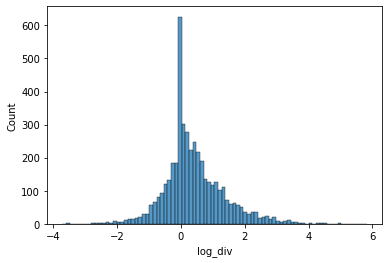

In [29]:
sns.histplot(df['log_div'])

In [41]:
df['meme_score_vanilla_log'] = df['meme_score_vanilla'].apply(np.log)

In [47]:
fig = px.density_contour(df, y='log_div', x='meme_score_vanilla_log')
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [55]:
fig = px.scatter(df, x=df['sticking_factor_A'], y=df['sparking_factor_BT'], hover_name='most_common')
fig.show()

In [54]:
fig = px.scatter(df, x=df['meme_score_A'], y=df['meme_score_BT'], hover_name='most_common', log_x=True)
fig.show()